In [ ]:
pip install yfinance pandas requests plotly

In [1]:
# -- Question 1: Tesla Stock Data --
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="5y")

print("Tesla stock data sample:")
print(tesla_stock_data.head())

Tesla stock data sample:
                                Open       High        Low      Close  \
Date                                                                    
2020-06-10 00:00:00-04:00  66.125336  68.498665  65.500000  68.336670   
2020-06-11 00:00:00-04:00  66.013336  67.930664  64.800003  64.856003   
2020-06-12 00:00:00-04:00  65.333336  65.865334  60.840000  62.352001   
2020-06-15 00:00:00-04:00  61.186001  66.589333  60.566666  66.059998   
2020-06-16 00:00:00-04:00  67.456665  67.525330  64.159332  65.475334   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-06-10 00:00:00-04:00  278451000        0.0           0.0  
2020-06-11 00:00:00-04:00  238747500        0.0           0.0  
2020-06-12 00:00:00-04:00  251451000        0.0           0.0  
2020-06-15 00:00:00-04:00  235458000        0.0           0.0  
2020-06-16 00:00:00-04:00  210766500        0.0           0.0  


In [2]:
# -- Question 2: Tesla Revenue Data --
import requests
from io import StringIO
import pandas as pd

tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
tesla_response = requests.get(tesla_url, headers=headers)

if tesla_response.status_code == 200:
    tesla_tables = pd.read_html(StringIO(tesla_response.text))
    tesla_revenue_df = tesla_tables[0]
    tesla_revenue_df.columns = ['Date', 'Revenue']
    tesla_revenue_df = tesla_revenue_df.dropna()
    print("\nTesla revenue data sample:")
    print(tesla_revenue_df.head())
else:
    print(f"Failed to fetch Tesla revenue data. Status: {tesla_response.status_code}")


Tesla revenue data sample:
   Date  Revenue
0  2024  $97,690
1  2023  $96,773
2  2022  $81,462
3  2021  $53,823
4  2020  $31,536


In [3]:
# -- Question 3: GameStop Stock Data --
gme = yf.Ticker("GME")
gme_stock_data = gme.history(period="5y")

print("\nGameStop stock data sample:")
print(gme_stock_data.head())


GameStop stock data sample:
                             Open    High     Low   Close    Volume  \
Date                                                                  
2020-06-10 00:00:00-04:00  1.1950  1.3825  1.1700  1.2675  42425600   
2020-06-11 00:00:00-04:00  1.1600  1.2250  1.0450  1.0925  24944000   
2020-06-12 00:00:00-04:00  1.1500  1.1950  1.0975  1.1800  17512800   
2020-06-15 00:00:00-04:00  1.1250  1.1925  1.1050  1.1725  15636000   
2020-06-16 00:00:00-04:00  1.2375  1.2375  1.1275  1.1600  12485200   

                           Dividends  Stock Splits  
Date                                                
2020-06-10 00:00:00-04:00        0.0           0.0  
2020-06-11 00:00:00-04:00        0.0           0.0  
2020-06-12 00:00:00-04:00        0.0           0.0  
2020-06-15 00:00:00-04:00        0.0           0.0  
2020-06-16 00:00:00-04:00        0.0           0.0  


In [4]:
# -- Question 4: GameStop Revenue Data --
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_response = requests.get(gme_url, headers=headers)

if gme_response.status_code == 200:
    gme_tables = pd.read_html(StringIO(gme_response.text))
    gme_revenue_df = gme_tables[0]
    gme_revenue_df.columns = ['Date', 'Revenue']
    gme_revenue_df = gme_revenue_df.dropna()
    print("\nGameStop revenue data sample:")
    print(gme_revenue_df.head())
else:
    print(f"Failed to fetch GameStop revenue data. Status: {gme_response.status_code}")


GameStop revenue data sample:
   Date Revenue
0  2025  $3,823
1  2024  $5,273
2  2023  $5,927
3  2022  $6,011
4  2021  $5,090


In [5]:
# -- Data Cleanup: Remove $ and , from Revenue columns --
tesla_revenue_df['Revenue'] = tesla_revenue_df['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)
gme_revenue_df['Revenue'] = gme_revenue_df['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)

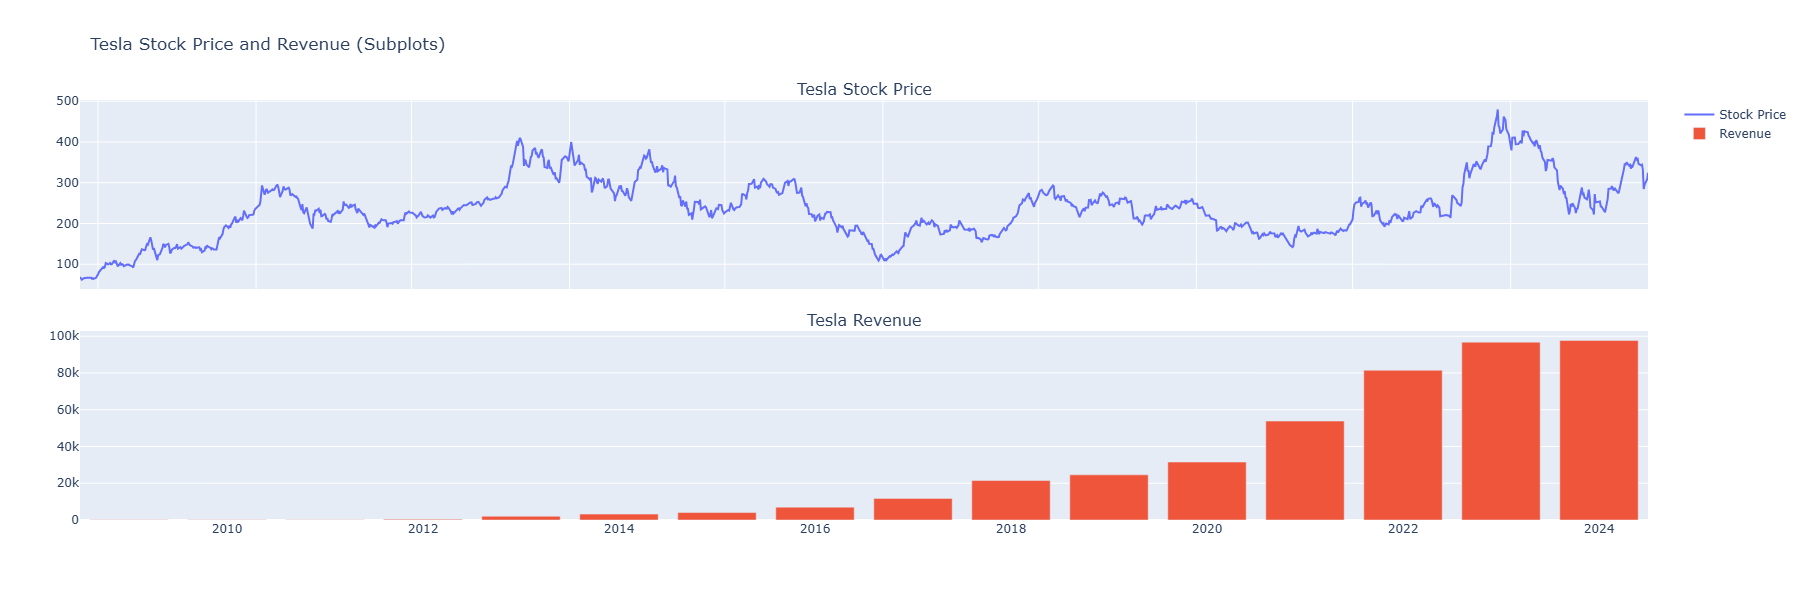

In [8]:
# -- Question 5: Tesla Dashboard Visualization --
from plotly.subplots import make_subplots

# Tesla Dashboard with subplots
fig_tesla = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                          subplot_titles=("Tesla Stock Price", "Tesla Revenue"))

fig_tesla.add_trace(go.Scatter(x=tesla_stock_data.index, y=tesla_stock_data['Close'],
                               mode='lines', name='Stock Price'), row=1, col=1)

fig_tesla.add_trace(go.Bar(x=tesla_revenue_df['Date'], y=tesla_revenue_df['Revenue'],
                           name='Revenue'), row=2, col=1)

fig_tesla.update_layout(title="Tesla Stock Price and Revenue (Subplots)", height=600)
fig_tesla.show()


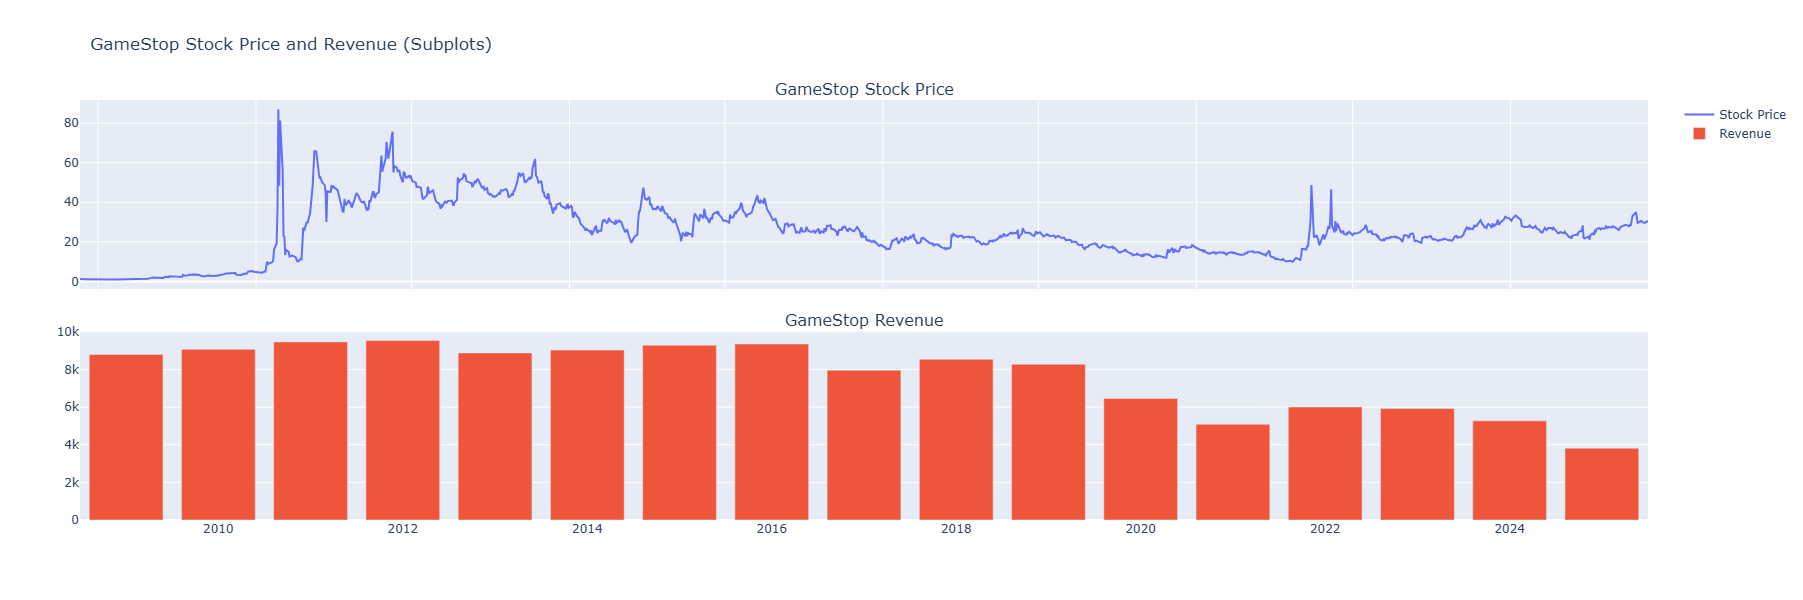

In [9]:
# -- Question 6: GameStop Dashboard Visualization --

# GameStop Dashboard with subplots
fig_gme = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                        subplot_titles=("GameStop Stock Price", "GameStop Revenue"))

fig_gme.add_trace(go.Scatter(x=gme_stock_data.index, y=gme_stock_data['Close'],
                             mode='lines', name='Stock Price'), row=1, col=1)

fig_gme.add_trace(go.Bar(x=gme_revenue_df['Date'], y=gme_revenue_df['Revenue'],
                         name='Revenue'), row=2, col=1)

fig_gme.update_layout(title="GameStop Stock Price and Revenue (Subplots)", height=600)
fig_gme.show()
